In [ ]:
#import packages
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import PIL
from PIL import Image
import warnings

In [28]:
#initializations
warnings.simplefilter("ignore")
label_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
i=0

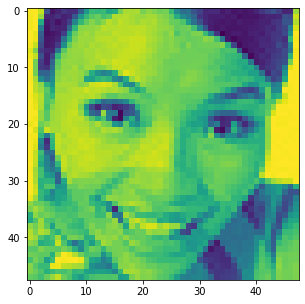

In [ ]:
#import image
img = Image.open('/content/selected_img.jpeg')  #point to js resource folder holding this file. hold trained model in the resoure folder as well
plt.figure(figsize = (5,5))
plt.imshow(img)

In [ ]:
# load the saved model
model = load_model("/content/final_model.h5")  # put in resource folder with selected image
print('Tensorflow keras Model loaded successfully')

Tensorflow keras Model loaded successfully


In [ ]:
img = img.resize((48, 48), Image.ANTIALIAS) #resize the image using PIL's builtin function
img = np.array(img)
if len(img.shape) == 2:  #if the user is uploading a black and white image
    img=np.stack((img,)*3, axis=-1)
img = np.expand_dims(img,axis=0) # the size of the first
print(img.shape)
img = img/255.0

(1, 48, 48, 3)


In [ ]:
# process image through prediction model
pred = model.predict(img)

# softmax function rescales each element/dimension to lie between [0,1] and add up to 1.0
score = tf.nn.softmax(pred[0]) 
print(score)

tf.Tensor(
[0.11497572 0.11497249 0.1149953  0.30876982 0.11591969 0.11499941
 0.11536762], shape=(7,), dtype=float32)


In [ ]:
# print prediction label and confidence level
print(
    "This expression is most likely {} with a {:.2f} share of distribution."
    .format(label_names[np.argmax(score)], 100 * np.max(score))
)
print(
    "This expression is least likely {} with a {:.2f} share of distribution."
    .format(label_names[np.argmin(score)], 100 * np.min(score))
)
# because we are using softmax this is not the standard statistical confidence level

This expression is most likely happy with a 30.88 share of distribution.
This expression is least likely disgust with a 11.50 share of distribution.


In [ ]:
# put together a pd dataframe with args and scores
results_df = pd.DataFrame({'Expression': label_names})

scores = np.array(score)
scores_s = pd.Series(scores)
results_df['Distribution'] = scores_s

results_df

,Expression,Distribution
0,angry,0.114976
1,disgust,0.114972
2,fear,0.114995
3,happy,0.308770
4,neutral,0.115920
5,sad,0.114999
6,surprise,0.115368


In [ ]:
# sort by scores from high to low
results_df = results_df.sort_values(by='Distribution', ascending=False)
results_df
# this code is not needed if only passing top 3.  use code below to pass top 3

,Expression,Distribution
3,happy,0.308770
4,neutral,0.115920
6,surprise,0.115368
5,sad,0.114999
2,fear,0.114995
0,angry,0.114976
1,disgust,0.114972


In [ ]:
# select top 3 most likely expressions with images and confidence to return to the dashboard
top3_df = results_df.nlargest(3,'Distribution')
top3_sum = top3_df.Distribution.sum()
top3_df['PredictScore'] = top3_df['Distribution']/top3_sum
top3_df = top3_df.drop('Distribution', 1)
top3_df = top3_df.rename(columns={"PredictScore": "EmoScore"})
top3_df['EmoScore'] = top3_df['EmoScore'].map(lambda n: '{:.0%}'.format(n))
top3_df

,Expression,EmoScore
3,happy,57%
4,neutral,21%
6,surprise,21%


In [ ]:
# convert pandas into json file.  pull into javascript using D3?
top3_df.to_json('./export.json',orient='records')

In [30]:
# save top 3 emojis to javascript image folder 'emo3'
while i<3:
    #use top 3 results df to pull emotions type from top 3 instad of random choice for final file
    emotion = top3_df.iloc[i]['Expression']
    print(emotion)
    path = '/content/'+emotion+'.png'  #filepath to use for local version... '../FrontEndDashboard/static/images/emoAll/'
    print(path)
    img = Image.open(path)
    i+=1
    exportPath = '/emo'+str(i)+'.png'  #filepath to use for local version... '../FrontEndDashboard/static/images/emo3/emo'+str(i)+'.png'
    print(exportPath)
    img.save(exportPath)

In [ ]:
print(tf.__version__) # tensorflow version

2.6.0


In [ ]:
print(keras.__version__) # keras version

2.6.0


In [ ]:
print(np.__version__) # numpy version

1.19.5


In [ ]:
print(pd.__version__) # pandas version

1.1.5


In [ ]:
print(matplotlib.__version__) # matplotlib version

3.2.2


In [ ]:
print(PIL.__version__) # PIL version

7.1.2
